In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv
/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv')
df

#date format : YYYY-MM-DD e.g. 2023-10-2
#need convert to python format

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
print(len(df)) # to print the dataframe
print(type(df))
df.shape

1197
<class 'pandas.core.frame.DataFrame'>


(1197, 15)

In [4]:
# to convert to date format
df["date"] = pd.to_datetime(df['date'])
df['date']

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [5]:
df.iloc[3:8] # to subset the dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683


In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [7]:
# print dept
df['department'].unique()
df['quarter'].unique()

# to make conditional filter
cond1 = df['department'] == 'sweing'
cond2 = df['quarter'] == 'Quarter1'
cond3 = df['team'] == 1
mask = cond1 & cond2 & cond3

#filter based on conditional
df2 = df[mask]
df2

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
24,2015-01-03,Quarter1,sweing,Saturday,1,0.80,28.08,772.0,6300,50,0.0,0,0,56.5,0.800725
49,2015-01-04,Quarter1,sweing,Sunday,1,0.80,26.16,1033.0,7080,63,0.0,0,0,59.0,0.800319
70,2015-01-05,Quarter1,sweing,Monday,1,0.80,26.16,1138.0,7080,63,0.0,0,0,59.0,0.800319
88,2015-01-06,Quarter1,sweing,Tuesday,1,0.80,26.16,1187.0,10620,75,0.0,0,0,59.0,0.850502
106,2015-01-07,Quarter1,sweing,Wednesday,1,0.80,26.16,1179.0,10620,75,0.0,0,0,59.0,0.850502
544,2015-02-01,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2015-02-02,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2015-02-03,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019
605,2015-02-04,Quarter1,sweing,Wednesday,1,0.80,22.52,1532.0,6900,88,0.0,0,0,57.5,0.900147


https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

About this file
Attribute Information:

01 date : Date in MM-DD-YYYY
02 day : Day of the Week
03 quarter : A portion of the month. A month was divided into four quarters
04 department : Associated department with the instance
05 team_no : Associated team number with the instance
06 no_of_workers : Number of workers in each team
07 no_of_style_change : Number of changes in the style of a particular product
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09 smv : Standard Minute Value, it is the allocated time for a task
10 wip : Work in progress. Includes the number of unfinished items for products
11 over_time : Represents the amount of overtime by each team in minutes
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13 idle_time : The amount of time when the production was interrupted due to several reasons
14 idle_men : The number of workers who were idle due to production interruption
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [8]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


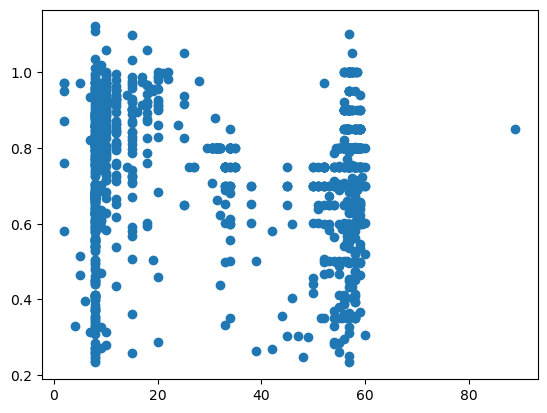

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot
x = df['no_of_workers']
y = df['actual_productivity']

plt.scatter(x,y)


<Axes: xlabel='over_time', ylabel='Count'>

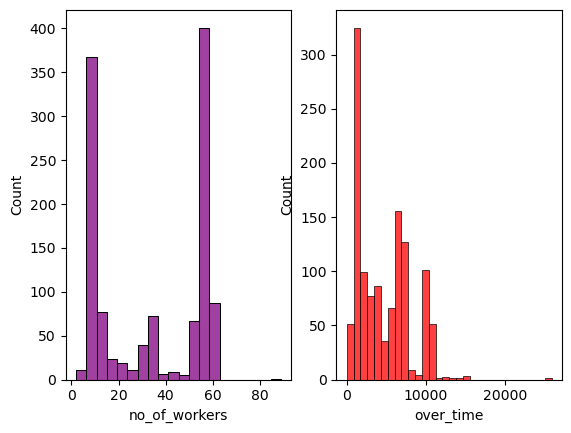

In [10]:
# histogram
plt.subplot(1,2,1)
sns.histplot(df['no_of_workers'], color='purple', bins=20)

plt.subplot(1,2,2)
sns.histplot(df['over_time'], color='red', bins=30)

<Axes: xlabel='date'>

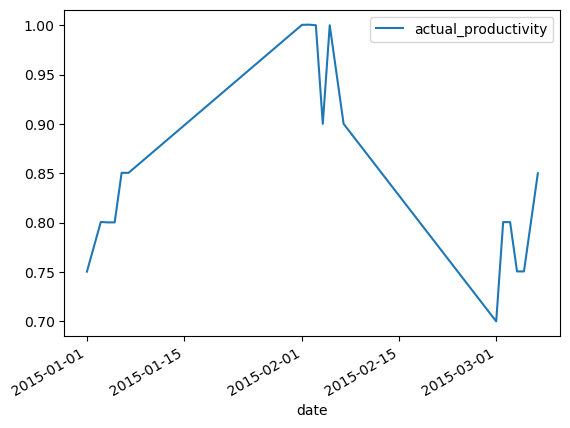

In [11]:
# plot df2 dataframe
df2.plot(x='date', y='actual_productivity')